In [35]:
import pandas as pd
import numpy as np
%matplotlib inline  

In [36]:
 import os
 os.getcwd()

'D:\\python_live\\Day 3_4'

In [37]:
# excel, csv, text, json
    
df = pd.read_csv('titanic.csv', delimiter = '\t' )
# df = pd.read_csv(r'C:\Users\Dralls\Desktop\Imarticus\DSP\Pandas Numpy complete\titanic.csv', delimiter = '\t' )

#  sep = '\t'

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [39]:
df.Embarked.mode()

0    S
dtype: object

In [73]:
# Treating Null values
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)
df['Age'].fillna(df.Age.mean(), inplace = True)
df['Cabin'].fillna(method = 'ffill',inplace = True)

In [62]:
#df.dropna(inplace = True) # to drop Null values
#df.isna().sum() # find null values

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    int32  
 5   Age          156 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        156 non-null    object 
 11  Embarked     156 non-null    object 
 12  coded        156 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 15.4+ KB


In [75]:
pd.get_dummies(df.Sex,drop_first=True)  # n-1

,1
0,0
1,1
2,1
3,1
4,0
...,...
151,1
152,0
153,0
154,0


In [76]:
q1= pd.get_dummies(df.Sex,drop_first=True)

In [77]:
df['coded'] = df.Sex.apply(lambda x: 1 if x=='female' else 0)

In [78]:
pd.concat([df,q1,],1).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,coded,1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C123,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1


In [79]:
a = np.where(df.Sex=='female')
df.Sex.iloc[a] = 1

C:\Users\sagarsah\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [80]:
df.Sex = np.where(df.Sex=='male',0,1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,coded
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C123,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,D26,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C123,S,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    int32  
 5   Age          156 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        156 non-null    object 
 11  Embarked     156 non-null    object 
 12  coded        156 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 15.4+ KB


In [82]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
coded          0
dtype: int64

<AxesSubplot:>

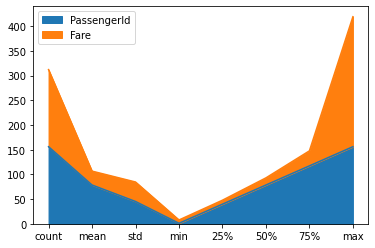

In [83]:
df.describe()[['PassengerId','Fare']].plot(kind = 'area')

# kind = 'bar', 'hist', 'barh'

<AxesSubplot:ylabel='Frequency'>

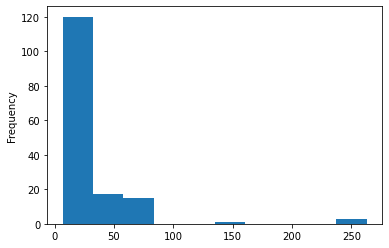

In [84]:
df['Fare'].plot(kind = 'hist')

In [85]:
df.describe(include = 'O')

,Name,Ticket,Cabin,Embarked
count,156,156,156,156
unique,156,145,28,3
top,"Panula, Master. Juha Niilo",CA 2144,B78,S
freq,1,2,21,111


<AxesSubplot:ylabel='Embarked'>

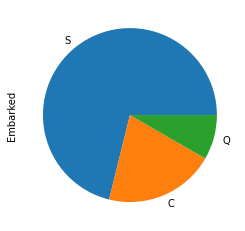

In [86]:
df.Embarked.value_counts().plot(kind = 'pie')

In [89]:
df.Sex.map({'female':0, 'male':1}).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sex, dtype: float64

In [88]:
df.Sex.replace({'female':0, 'male': 1}).head()

TypeError: Cannot compare types 'ndarray(dtype=int32)' and 'str'

In [90]:
df.Sex.apply(lambda x: 0 if x == 'female' else 1).head()

0    1
1    1
2    1
3    1
4    1
Name: Sex, dtype: int64

In [91]:
display(df.Sex.value_counts(),
        
        'Percent Representation',
        
        (df.Sex.value_counts(normalize = True)*100).astype(str)+' %')

1    156
Name: Sex, dtype: int64

'Percent Representation'

1    100.0 %
Name: Sex, dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    int32  
 5   Age          156 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        156 non-null    object 
 11  Embarked     156 non-null    object 
 12  coded        156 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 15.4+ KB


In [94]:
df.Cabin.isna().sum() # number of Null values

0

In [95]:
df.Cabin.isna().sum()/len(df)*100 # Null percentage Value

0.0

In [96]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'],drop_first =True)

In [97]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'coded', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [98]:
df.Embarked.fillna('S',inplace = True)
df.Embarked.isna().sum()


df.Age.fillna(df.Age.mean(),inplace = True)
df.Age.isnull().sum()



AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [99]:
a = df.Embarked.isna().astype(int)
a.apply(lambda x: 'S' if x == 1 else x)





a2 = df.Embarked.isna()
a2.apply(lambda x: 'S' if x == True else x)

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [100]:
df.groupby(['Embarked']).Survived.value_counts().to_frame().plot(kind = 'bar')

KeyError: 'Embarked'

In [101]:
df.groupby(['Embarked']).Survived.count().plot(kind = 'bar');

KeyError: 'Embarked'

In [102]:
df.drop(['Name','Sex','Age','SibSp','Parch','PassengerId','Cabin'],1,inplace = True)

KeyError: "['Sex'] not found in axis"

In [ ]:
df.head()

In [ ]:
df2 = df.copy()

In [ ]:
df['Embarked_2'] =  df.Embarked.replace(np.nan,'S')